## Telecom Customer Churn Prediction

### Dataset Information:
The Customer Churn dataset contains information on all <strong>7,043 customers</strong> from a Telecommunications company in California in Q2 2022.

### Notebook Objective:
In this notebook, we evaluate the performance of a machine learning model both with and without the application of Principal Component Analysis (PCA). Our aim is to comprehend the impact of dimensionality reduction on both the accuracy of the model and its computational efficiency. Additionally, we address various preprocessing techniques within this notebook, including filling missing values, normalization, anomaly detection, and oversampling. Through these analyses, we strive to gain insights into the effectiveness of these techniques in enhancing the performance and robustness of the machine learning model.




### Table of Content

<a id="contents_tabel"></a>   

* [1. Importing Libraries](#1)
    
* [2. Loading the Dataset](#2)
    
* [3. Dataset Overview](#3)  

* [4. EDA and Visualization](#17)
    
    * [4.1. Visualization of Nominal Features](#4)  

    * [4.2. Filling Null Values in Nominal Features](#5)
    
    * [4.3. Label Encoding](#6)

    * [4.4. Visualization of Numerical Features)](#7)

    * [4.5. Filling Null Nalues in Numerical Features](#8)

* [5. Preprocessing(Normalization, Anomaly Detection, and Oversampling)](#9)

* [6. Model Selection: Comparing and evaluating models with and without PCA](#10)
  
* [7. Model Performance Evaluation](#11)
  
* [8. ROC Curve Analysis](#12)

* [9. Confusion Matrix Analysis](#13)
  
* [9. Model Performance Metrics (Multiclass)](#13)

### Importing Libraries
[Tabel of Contents](#contents_tabel)

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC, OneClassSVM
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA

from time import perf_counter

import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset
[Tabel of Contents](#contents_tabel)

In [8]:
!pip install gdown
data = pd.read_csv('dataset.csv')

C:\Users\steph\anaconda3\Lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pRVk_O_hy9LVuHNWbDrdagZlI8WgRUNr
To: C:\Users\steph\dataset.csv

  0%|          | 0.00/1.44M [00:00<?, ?B/s]
 37%|###6      | 524k/1.44M [00:00<00:00, 3.94MB/s]
100%|##########| 1.44M/1.44M [00:00<00:00, 7.08MB/s]


### Dataset Overview
[Tabel of Contents](#contents_tabel)

In [10]:
data

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


This dataset has <strong>7043 records</strong> of customers and <strong>37 features</strong>. Customer status is the target.
Each record represents one customer and contains details about their demographics, location, tenure, subscription services, status for the quarter (joined, stayed, or churned), and more!



In [12]:
# data.describe(include='all').T

In [13]:
print(data.shape)
print(data.dtypes)
print(data.info())

(7043, 38)
Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object

In [14]:
data = data.drop(['Customer ID', 'City', 'Zip Code', 'Churn Category', 'Churn Reason'], axis=1)

In [15]:
data.duplicated().sum()

0

### EDA and Visualization

#### Visualization of Nominal Features
[Tabel of Contents](#contents_tabel)



In [17]:
df1 = data.select_dtypes(exclude='number')

In [18]:
df1.describe().T

,count,unique,top,freq
Gender,7043,2,Male,3555
Married,7043,2,No,3641
Offer,3166,5,Offer B,824
Phone Service,7043,2,Yes,6361
Multiple Lines,6361,2,No,3390
Internet Service,7043,2,Yes,5517
Internet Type,5517,3,Fiber Optic,3035
Online Security,5517,2,No,3498
Online Backup,5517,2,No,3088
Device Protection Plan,5517,2,No,3095


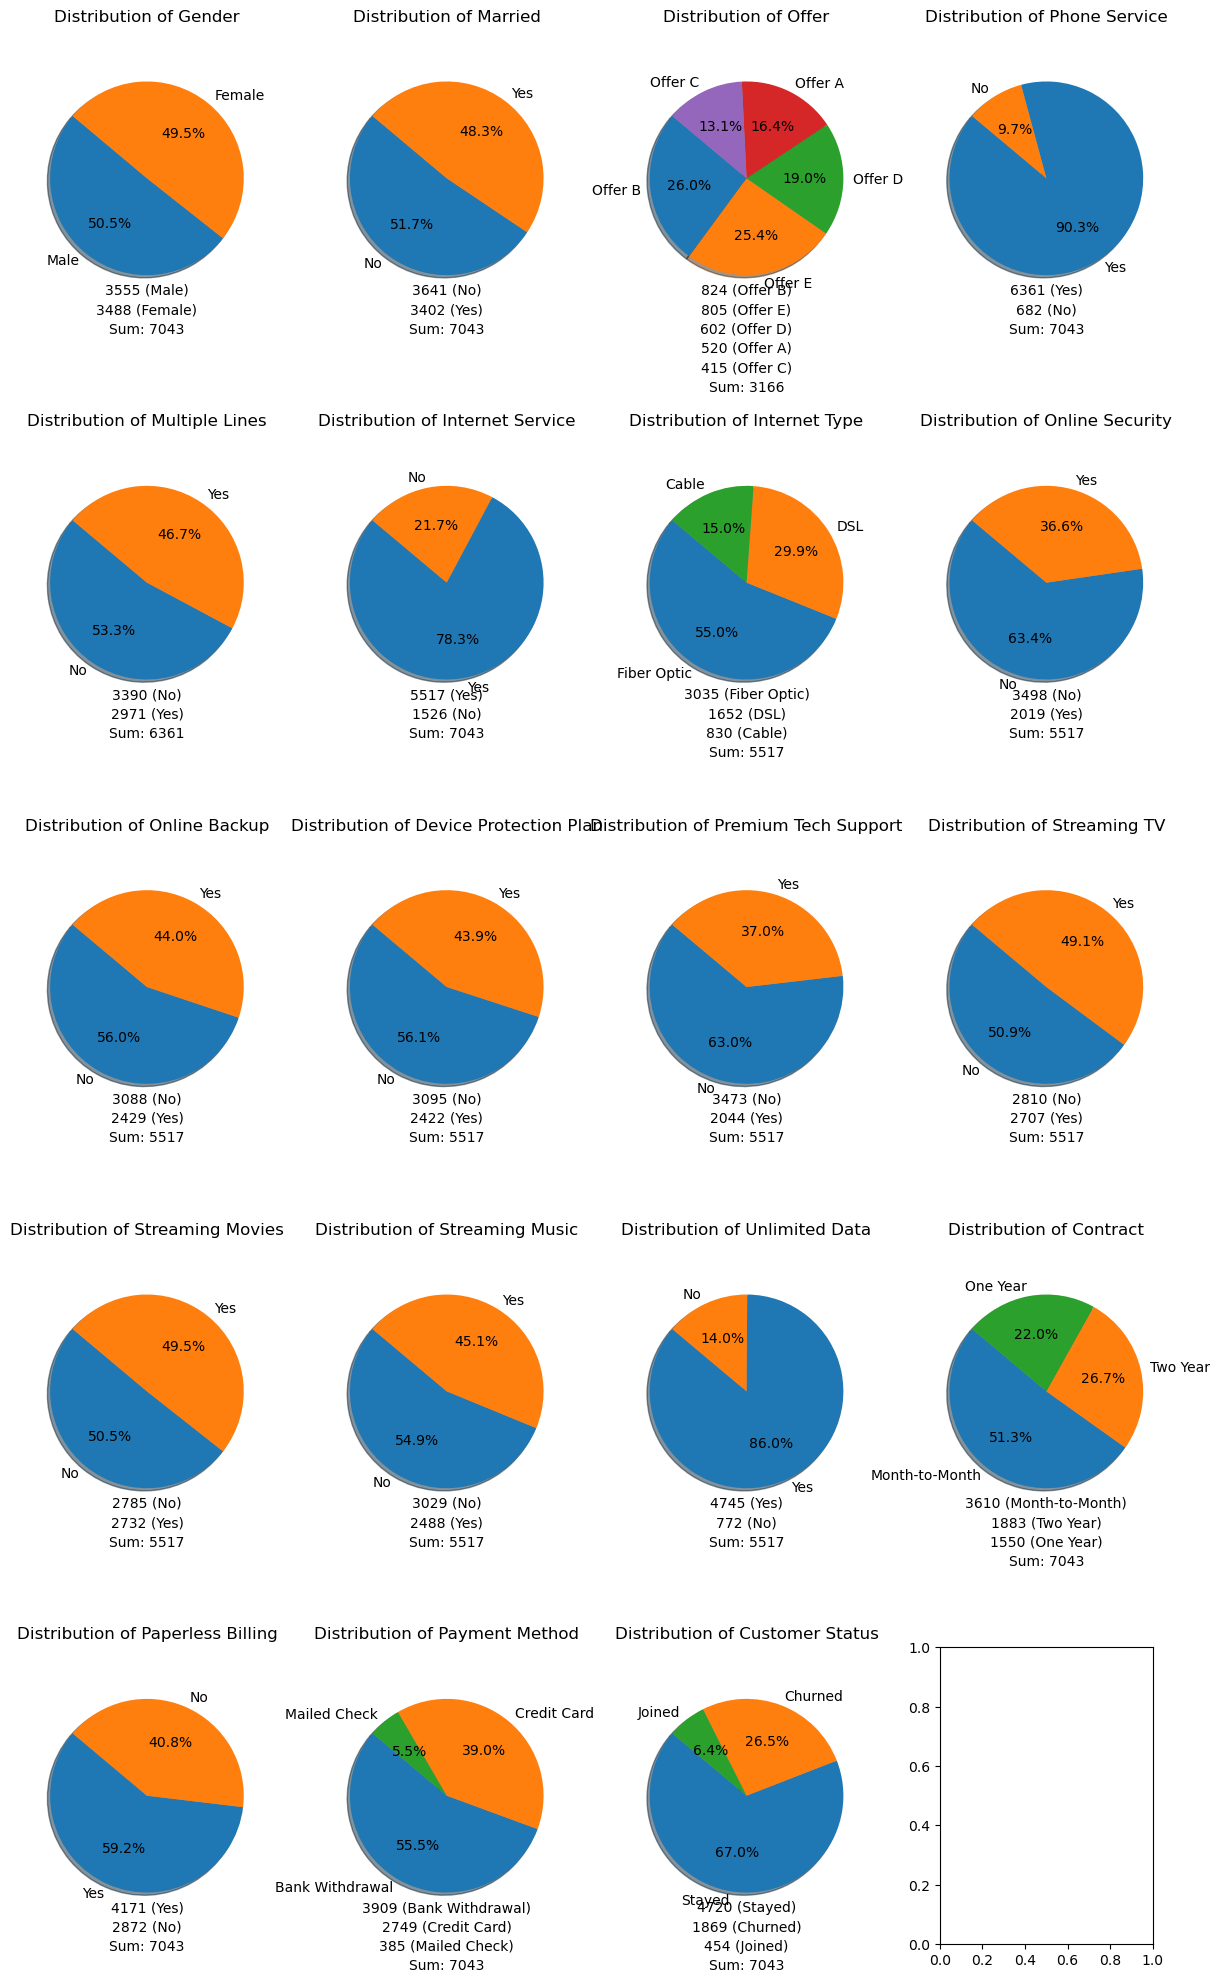

In [19]:
# Plotting the pie chart
num_rows = 5
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 20))

for i, column in enumerate(df1.columns):
    categories = df1[column].value_counts()

    ax = axes[i // num_cols, i % num_cols]

    ax.pie(categories, labels=categories.index, autopct='%1.1f%%', shadow=True, startangle=140)
    ax.axis('equal')
    ax.set_title(f'Distribution of {column}')

    # Add text annotations for value count and sum
    total = categories.values.sum()
    sum_text = f'Sum: {total}'
    ax.text(0, -1.2 - len(categories)*0.2, sum_text, ha='center')

    for j, percentage in enumerate(categories):
        percent_text = f'{percentage} ({categories.index[j]})'
        ax.text(0, -1.2 - j*0.2, percent_text, ha='center')

plt.tight_layout()
plt.savefig("piechart.png")
plt.show()

### Filling Null Values in Nominal Features
[Tabel of Contents](#contents_tabel)

null values in nominal features:
Gender                       0
Married                      0
Offer                     3877
Phone Service                0
Multiple Lines             682
Internet Service             0
Internet Type             1526
Online Security           1526
Online Backup             1526
Device Protection Plan    1526
Premium Tech Support      1526
Streaming TV              1526
Streaming Movies          1526
Streaming Music           1526
Unlimited Data            1526
Contract                     0
Paperless Billing            0
Payment Method               0
Customer Status              0
dtype: int64


<Axes: >

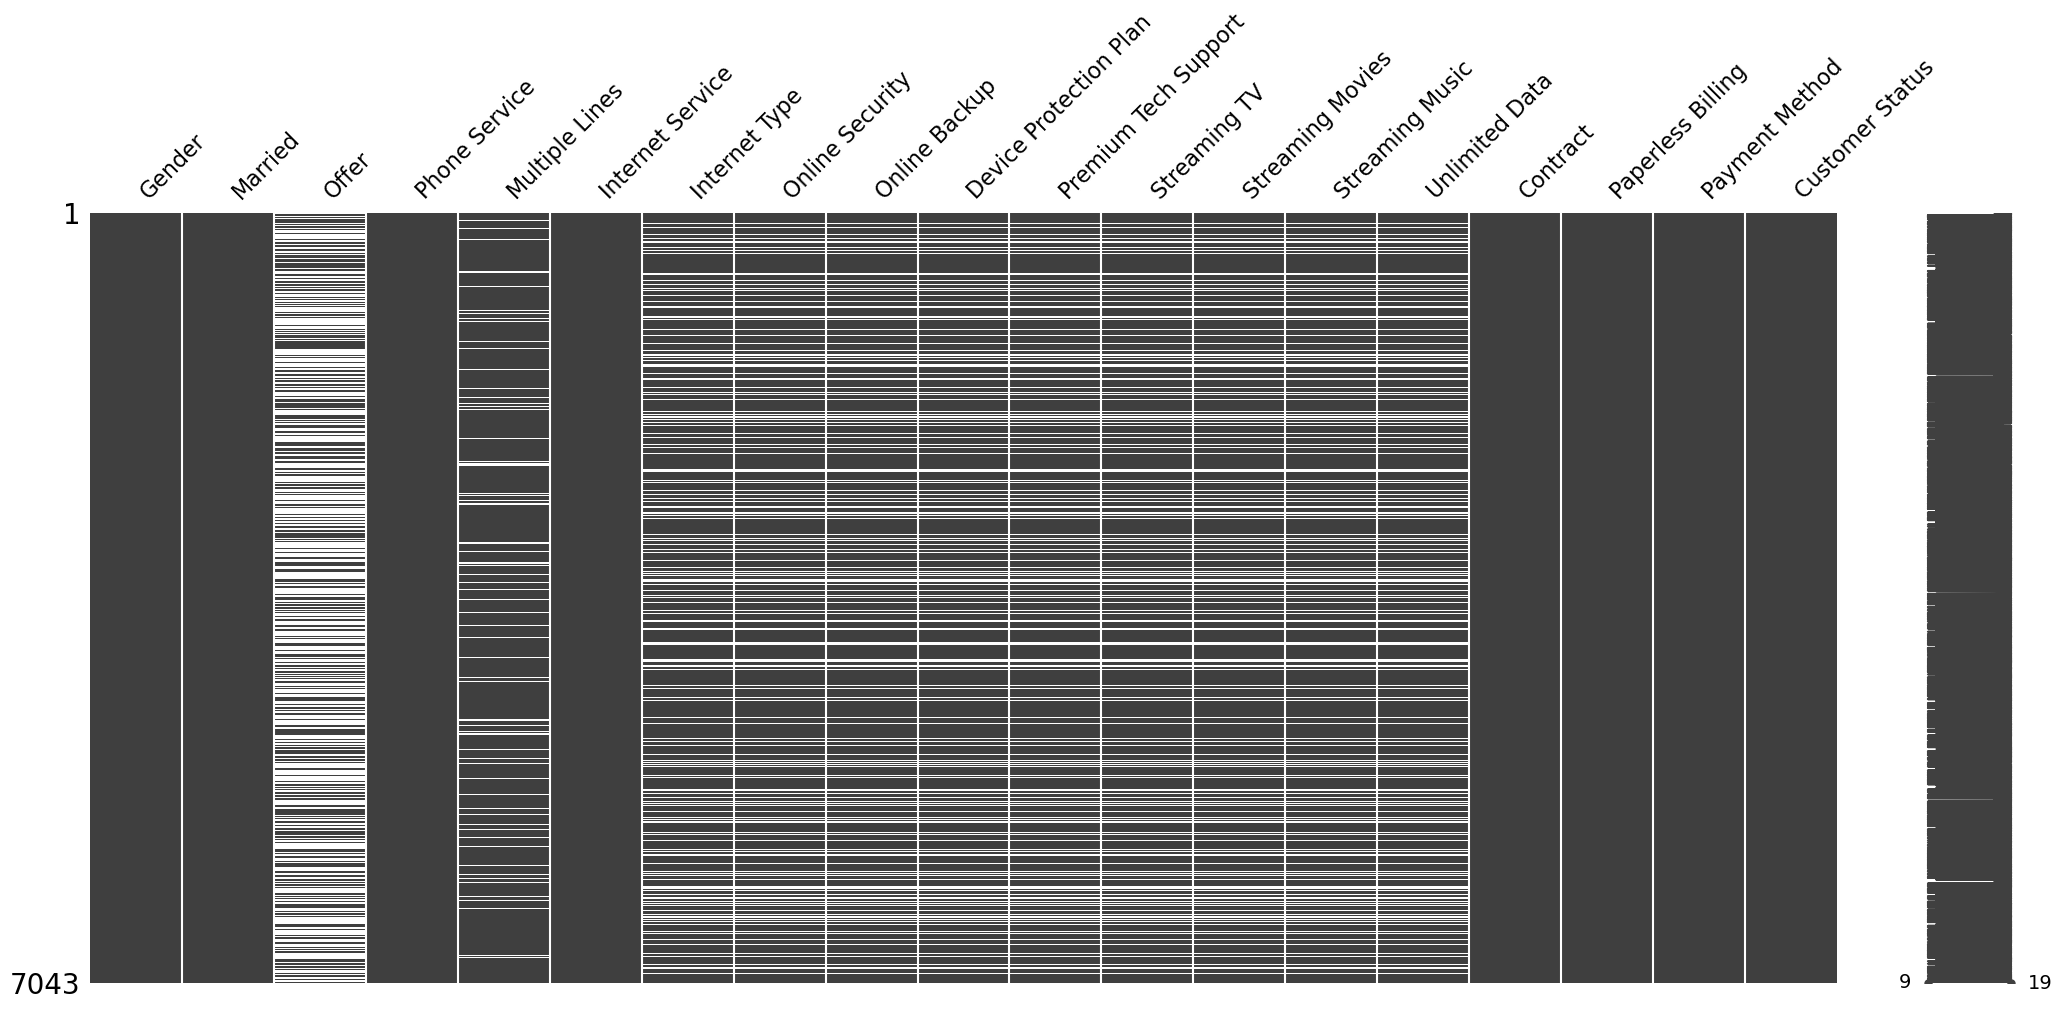

In [21]:
#checking null values
print(f"null values in nominal features:\n{df1.isna().sum()}")
msno.matrix(df1)


The internet service status indicates whether the customer is subscribed to internet service with the company, denoted as "Yes" or "No."
The total number of customers subscribing to internet services is <strong>5,517</strong>
As depicted in the preceding visualization, certain features are contingent upon internet service subscription. In other words, these features become accessible when the customer subscribes to internet service. These features include:

- Internet Type
- Online Security
- Online Backup
- Device Protection Plan
- Premium Tech Support
- Streaming TV
- Streaming Movies
- Streaming Music
- Unlimited Data

Based on the aforementioned findings, it's evident that customers who don't subscribe to internet services have null values in the mentioned features. Consequently, to standardize these features for analysis, the null values within these columns should be replaced with "No."



In [23]:
#filling null values
df1['Internet Type'] = df1['Internet Type'].apply(lambda x: 'None' if pd.isnull(x) else x)
df1['Offer'] = df1['Offer'].apply(lambda x: 'None' if pd.isnull(x) else x)

column_name = ['Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
               'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']
for column in column_name:
  df1[column] = df1[column].apply(lambda x: 'No' if pd.isnull(x) else x)

<Axes: >

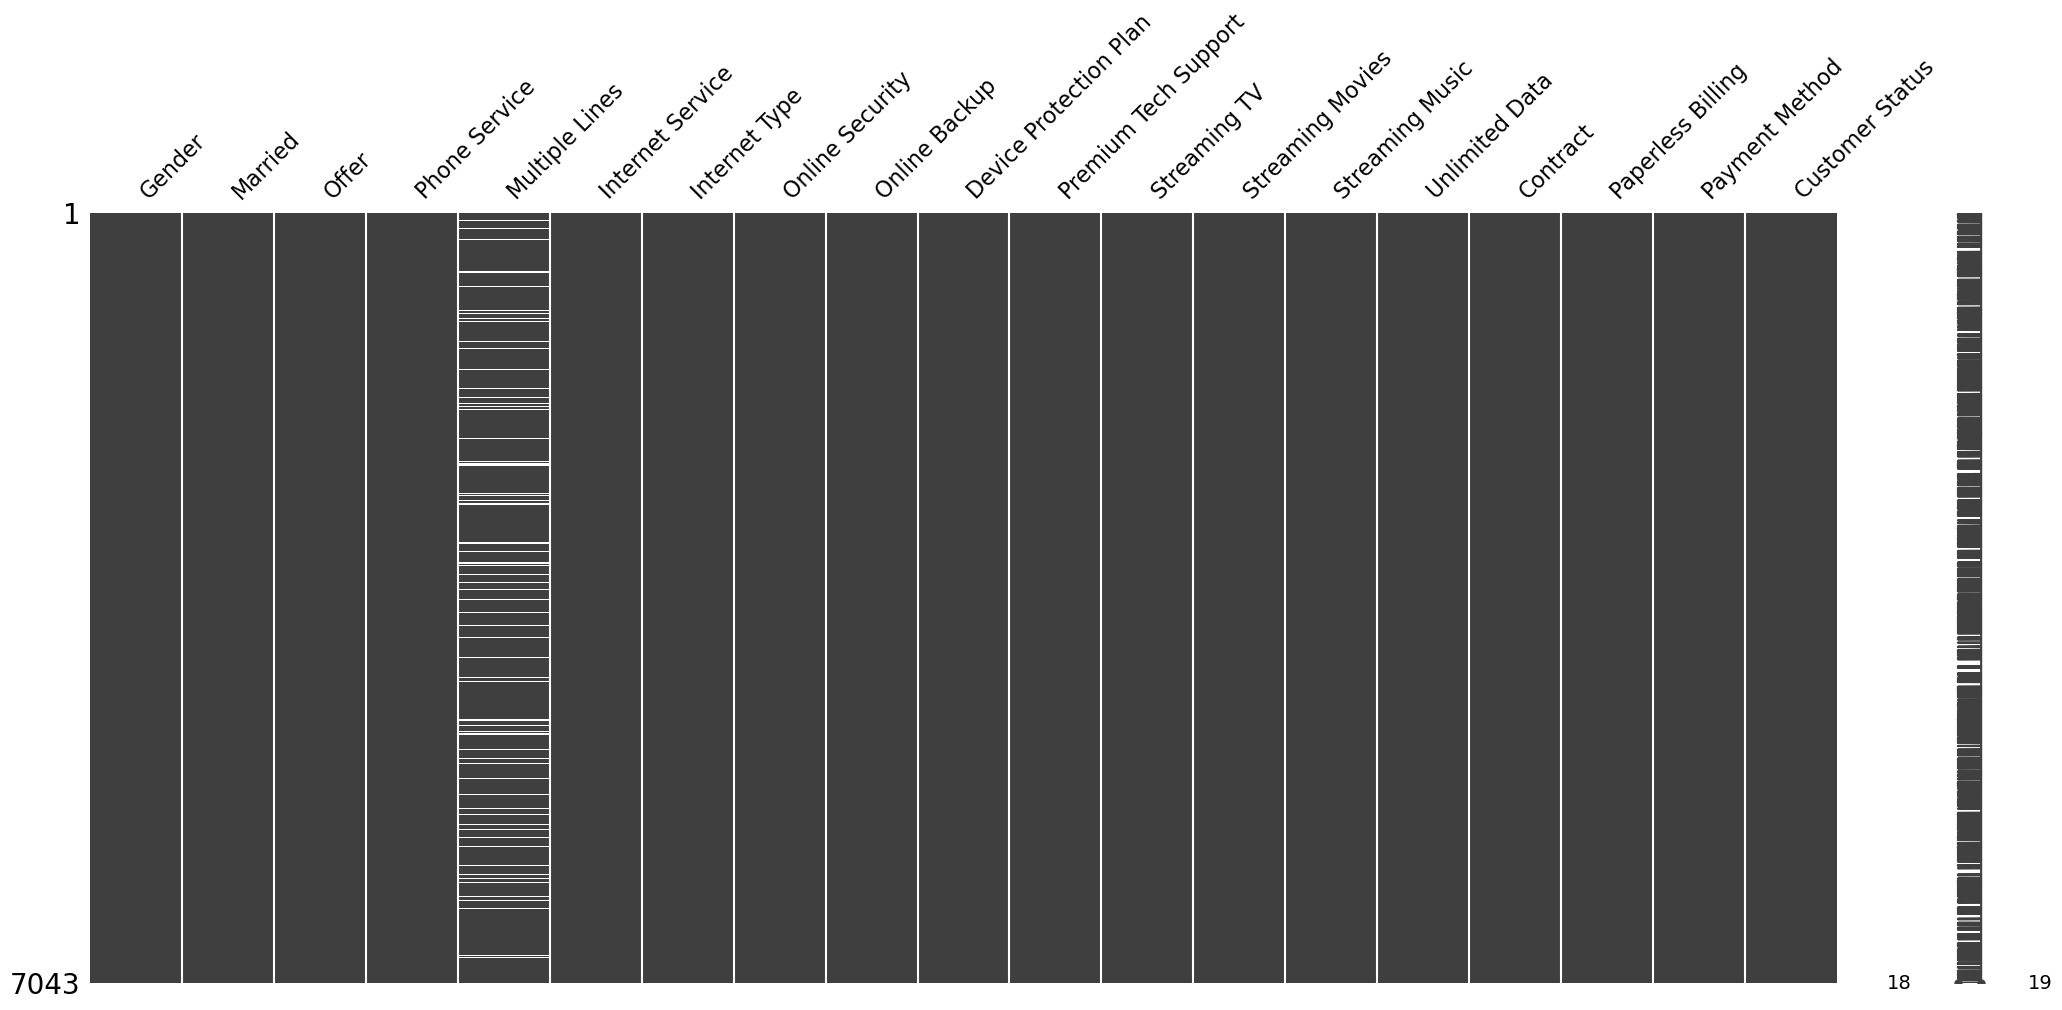

In [24]:
msno.matrix(df1)

We have made the decision to address missing values in the '<strong>Multiple Line</strong>' feature using the <strong>KNN imputer</strong> technique. As KNN imputer operates with numerical data, it necessitates that categorical features be converted into numerical representations. Therefore, prior to applying the KNN imputer, we will undertake the conversion of categorical features into numerical formats. This preprocessing step ensures compatibility with the imputation process, facilitating the effective handling of missing data within the '<strong>Multiple Line</strong>' feature.

### Label Encoding
[Tabel of Contents](#contents_tabel)

In [27]:
# first step:
conversion_dict = {"Yes": 1, "No": 0}
df1['Multiple Lines'] = df1['Multiple Lines'].map(conversion_dict)

# second step: labeling the target by using LabelEncoder
label_encoder = LabelEncoder()
df1['Customer Status'] = label_encoder.fit_transform(df1['Customer Status'])

# third step: using pd.get_dummies for other features
df1 = pd.get_dummies(df1, drop_first=True)

In [28]:
# Extract the label column before imputation
label_column = df1['Customer Status']
df1 = df1.drop(columns=['Customer Status'])

# the KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(df1)
# imputed_data = np.round(imputed_data)

# If we want to keep the DataFrame format:
df1_imputed = pd.DataFrame(data=imputed_data, columns=df1.columns)

# Reattach the label column
df1_imputed['Customer Status'] = label_column

<Axes: >

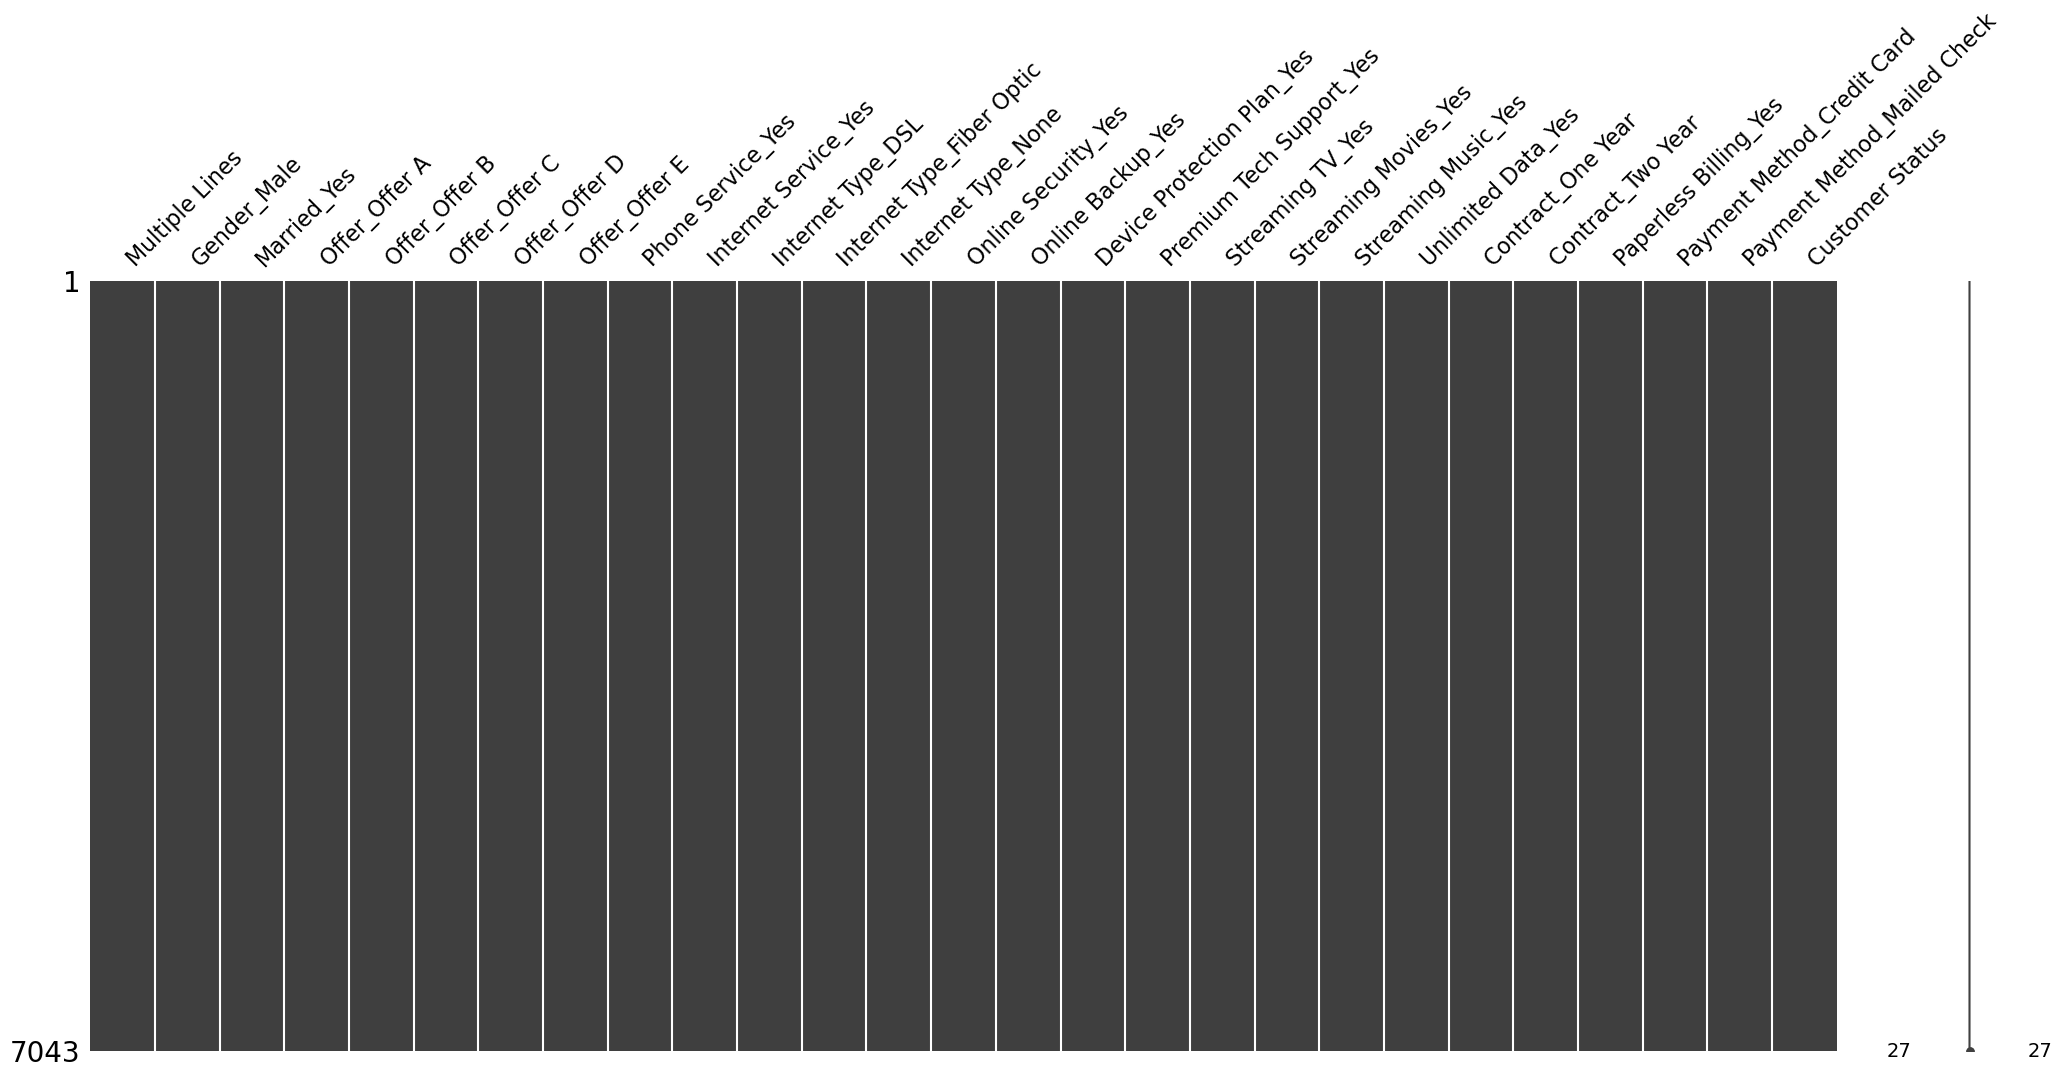

In [29]:
# checking missing value
msno.matrix(df1_imputed)

### Visualization of Numerical Features
[Tabel of Contents](#contents_tabel)

In [31]:
df2 = data.select_dtypes(include='number')

In [32]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7043.0,46.509726,16.750352,19.000000,32.000000,46.000000,60.000000,80.000000
Number of Dependents,7043.0,0.468692,0.962802,0.000000,0.000000,0.000000,0.000000,9.000000
Latitude,7043.0,36.197455,2.468929,32.555828,33.990646,36.205465,38.161321,41.962127
Longitude,7043.0,-119.756684,2.154425,-124.301372,-121.788090,-119.595293,-117.969795,-114.192901
Number of Referrals,7043.0,1.951867,3.001199,0.000000,0.000000,0.000000,3.000000,11.000000
Tenure in Months,7043.0,32.386767,24.542061,1.000000,9.000000,29.000000,55.000000,72.000000
Avg Monthly Long Distance Charges,6361.0,25.420517,14.200374,1.010000,13.050000,25.690000,37.680000,49.990000
Avg Monthly GB Download,5517.0,26.189958,19.586585,2.000000,13.000000,21.000000,30.000000,85.000000
Monthly Charge,7043.0,63.596131,31.204743,-10.000000,30.400000,70.050000,89.750000,118.750000
Total Charges,7043.0,2280.381264,2266.220462,18.800000,400.150000,1394.550000,3786.600000,8684.800000


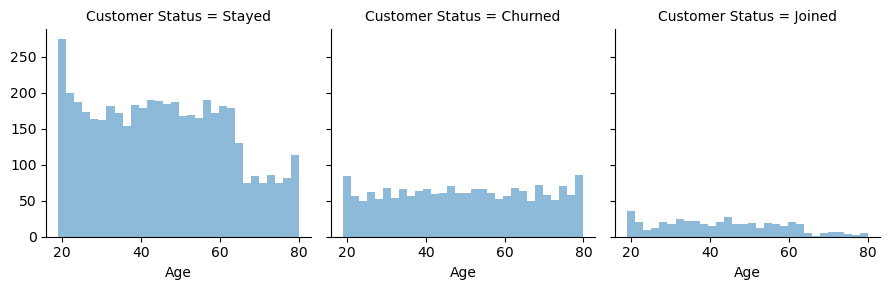

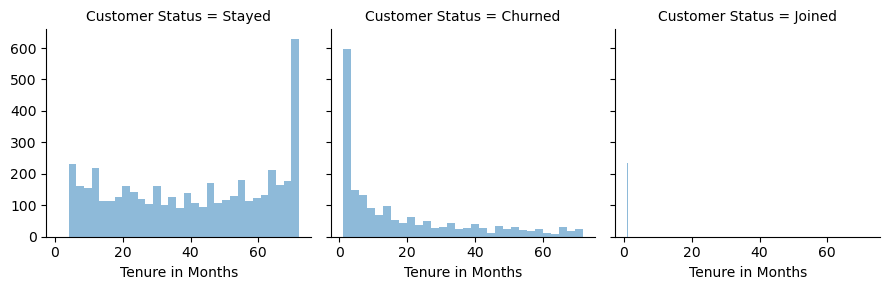

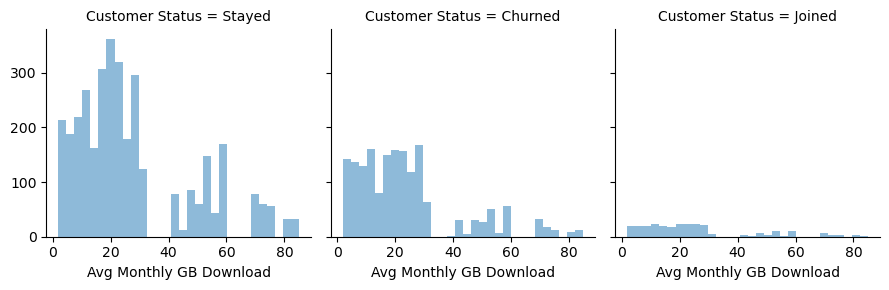

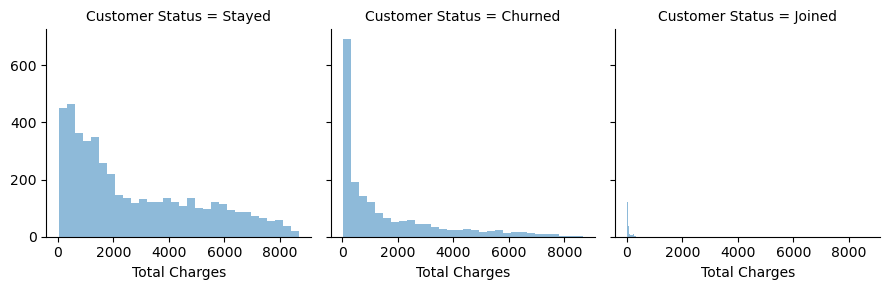

In [33]:
# Visualization
column_name = ['Age', 'Tenure in Months', 'Avg Monthly GB Download', 'Total Charges']
for column in column_name:
  v = sns.FacetGrid(data, col='Customer Status')
  v.map(plt.hist, column, alpha=0.5, bins=30)
  plt.show

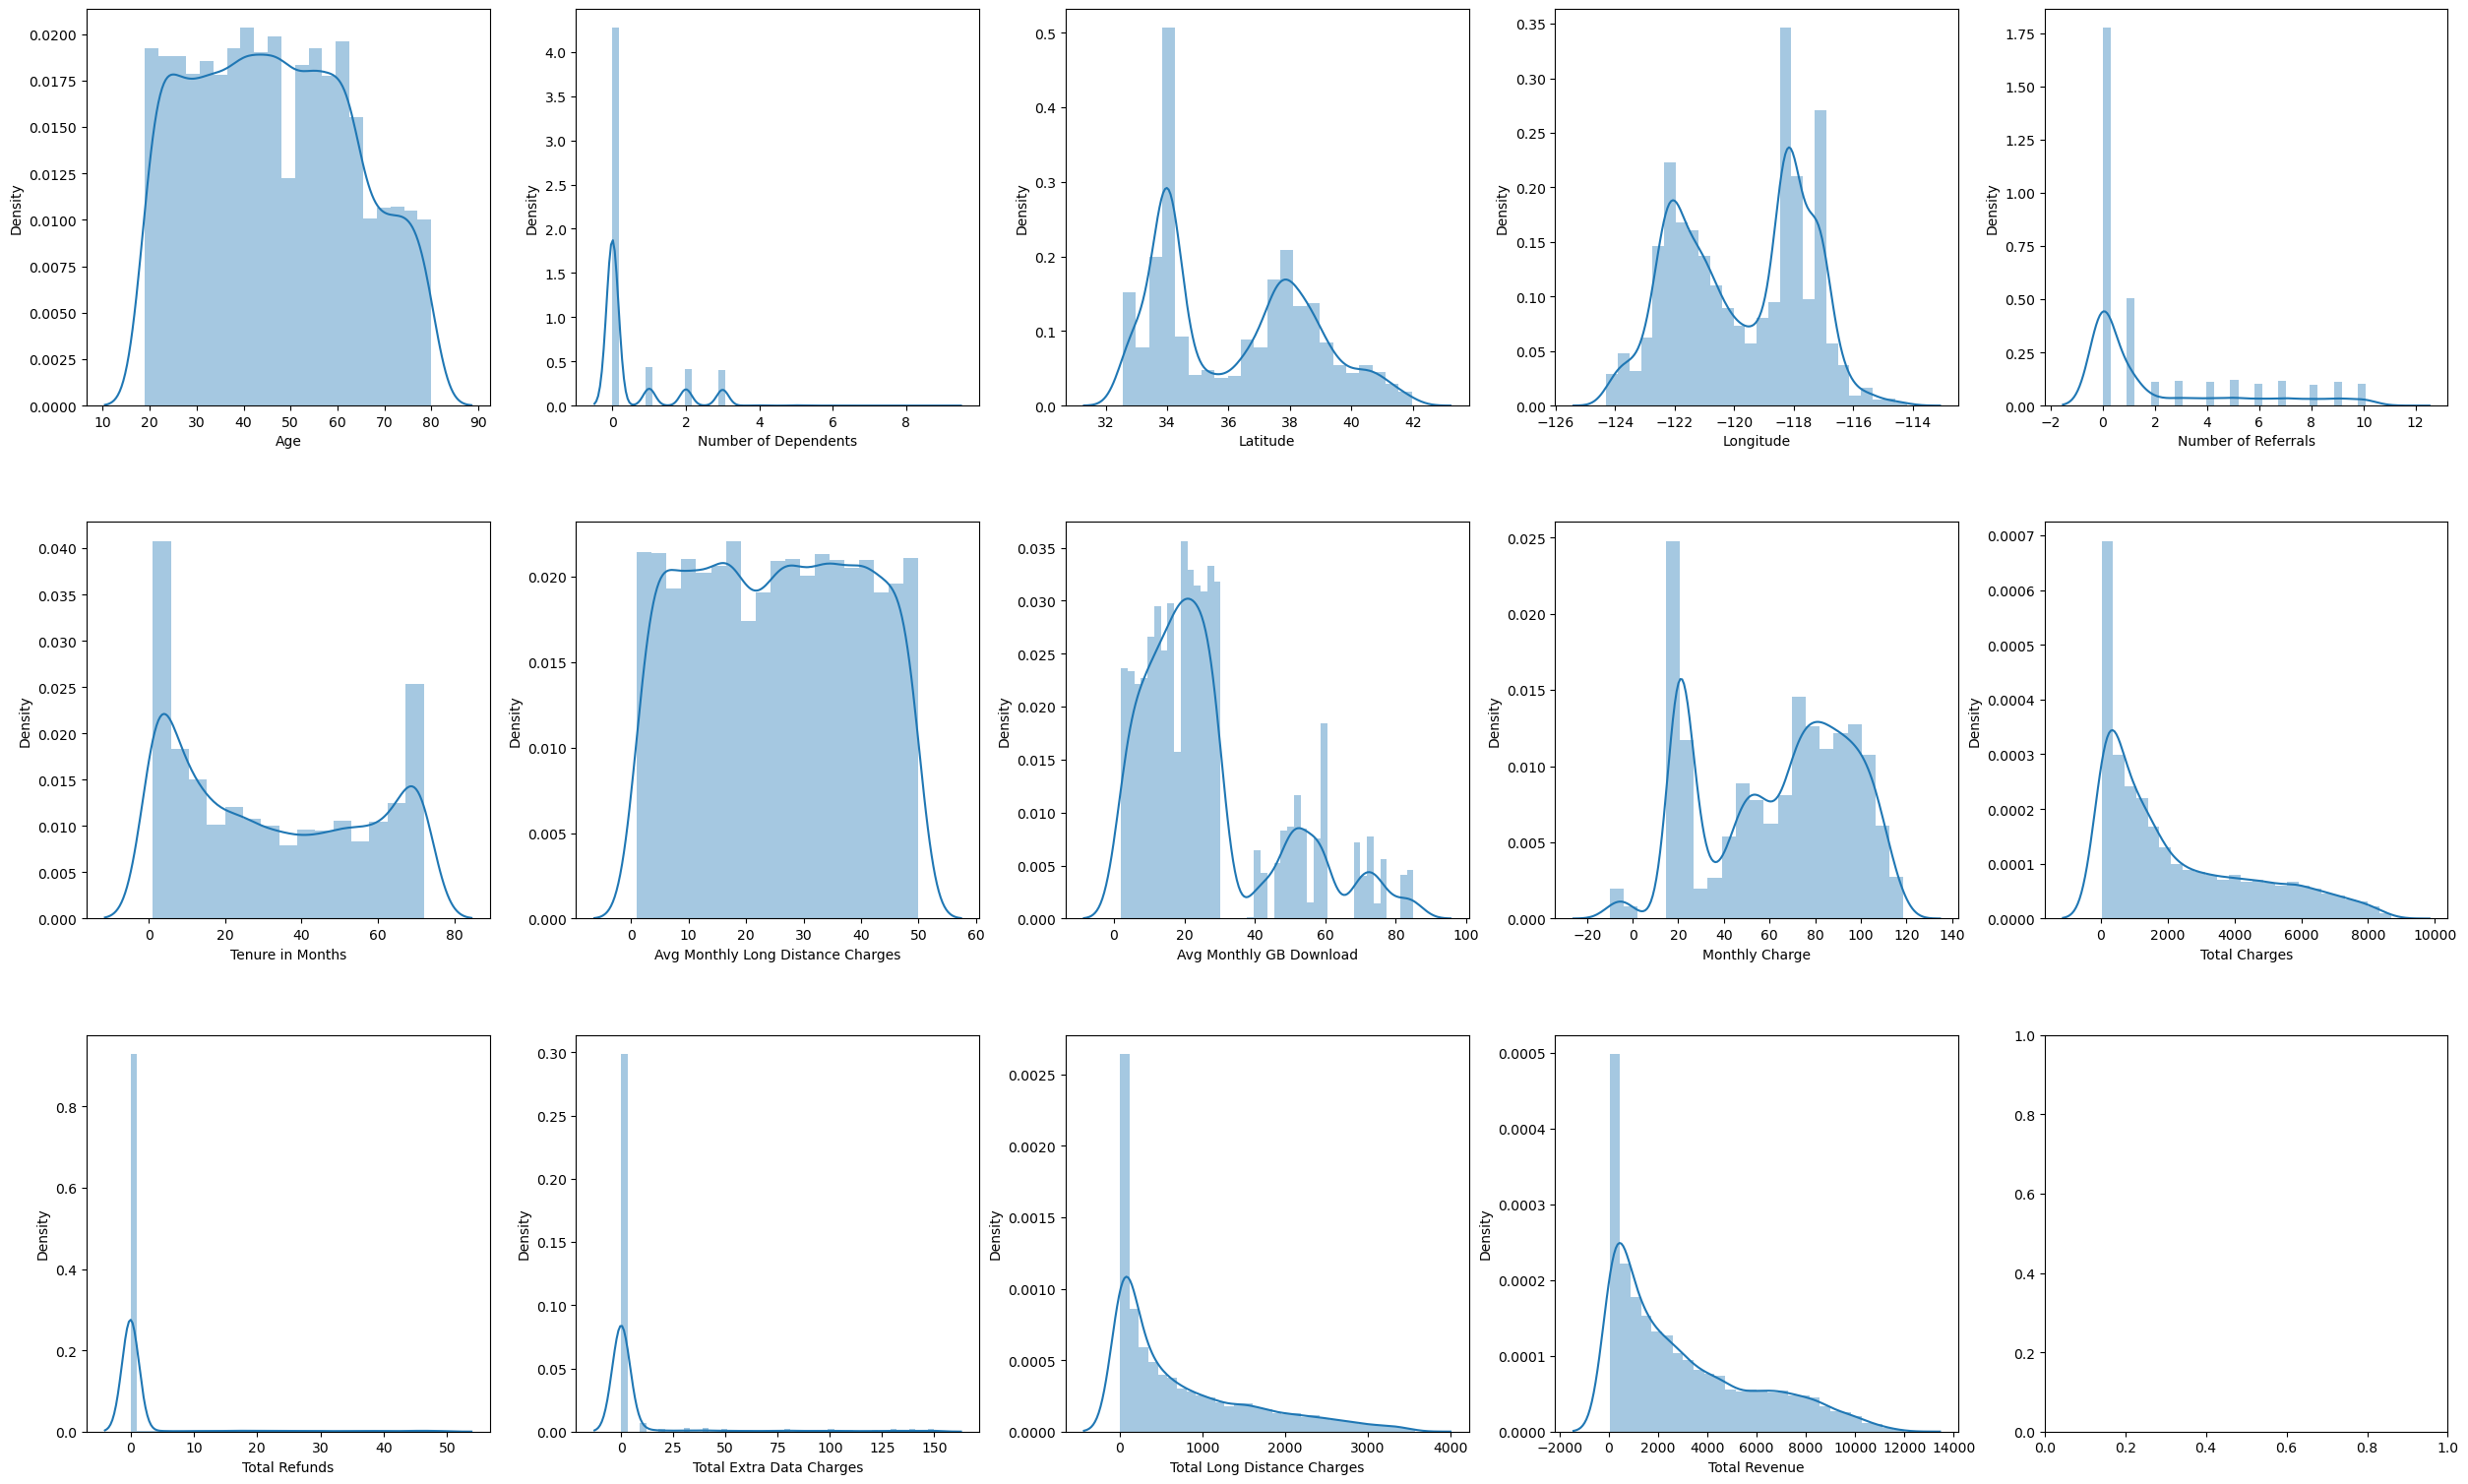

In [34]:
# visualization: distribution plot
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(25,15))
index = 0
axs = axs.flatten()
for k, v in df2.items():
  sns.distplot(v, ax=axs[index])
  index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5)

Age                                      Avg Monthly GB Download
Number of Dependents                     Avg Monthly GB Download
Latitude                                               Longitude
Longitude                                               Latitude
Number of Referrals                             Tenure in Months
Tenure in Months                                   Total Revenue
Avg Monthly Long Distance Charges    Total Long Distance Charges
Avg Monthly GB Download                                      Age
Monthly Charge                                     Total Charges
Total Charges                                      Total Revenue
Total Refunds                                   Tenure in Months
Total Extra Data Charges                           Total Revenue
Total Long Distance Charges                        Total Revenue
Total Revenue                                      Total Charges
dtype: object

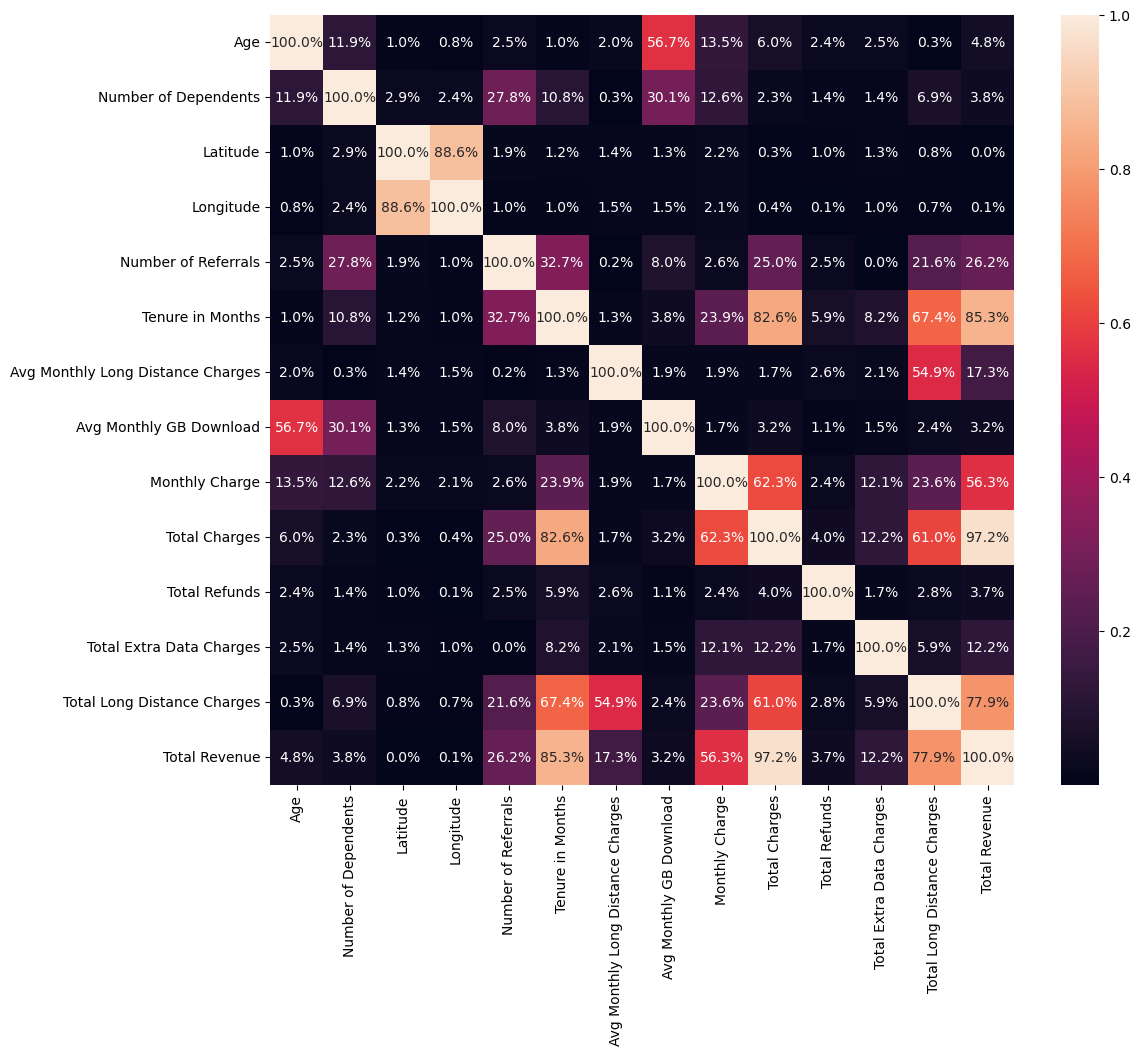

In [35]:
#heat map
corr_mat = df2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat.abs(), annot=True, fmt=".1%")

for x in range(len(df2.columns)):
  corr_mat.iloc[x,x] = 0.0
corr_mat.abs().idxmax()

#### Correlation Observation:
Due to the significant correlation between <strong>Total Charges</strong> and <strong>Total Revenue</strong>, it is advisable to discard one of them.

In [37]:
df2 = df2.drop(['Total Revenue'],axis=1)

### Filling Null Nalues in Numerical Features
[Tabel of Contents](#contents_tabel)

null values in numerical features:
 Age                                     0
Number of Dependents                    0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Avg Monthly Long Distance Charges     682
Avg Monthly GB Download              1526
Monthly Charge                          0
Total Charges                           0
Total Refunds                           0
Total Extra Data Charges                0
Total Long Distance Charges             0
dtype: int64


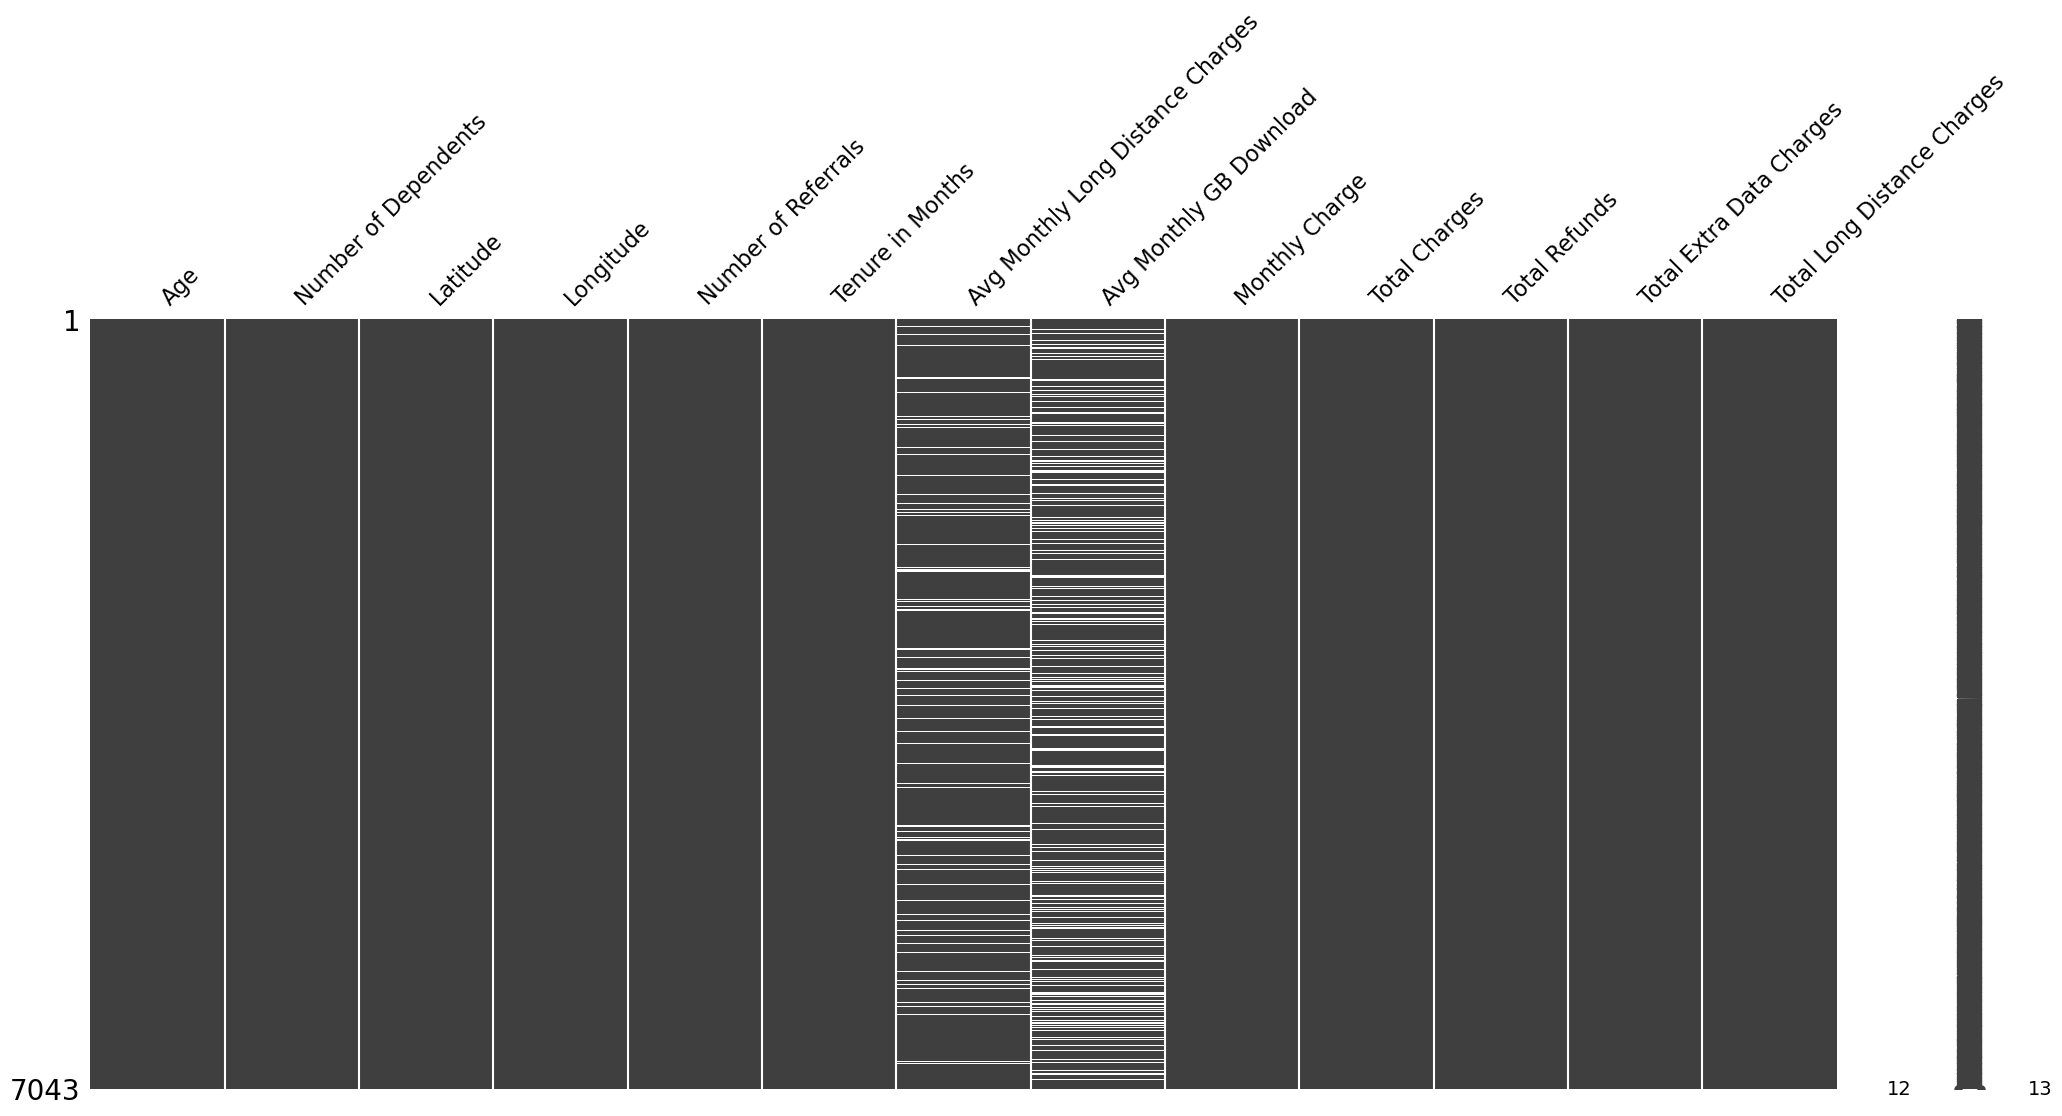

In [39]:
msno.matrix(df2)
print("null values in numerical features:\n",df2.isna().sum())

The "Internet service" category indicates whether customers have subscribed to the company's Internet service, with options being "Yes" or "No."
A total of <strong>5,517</strong> customers have subscribed to internet services.
Based on the preceding visualization, it is evident that the "<strong>Avg Monthly GB Download</strong>" feature is contingent upon internet service subscription. In simpler terms, this feature becomes active when a customer subscribes to the internet service.
Therefore, it's observed that customers who haven't subscribed to internet services possess null values in this particular feature. As a result, to prepare the data for analysis, the null values in this column should be replaced with <strong>0</strong>.

According to the information about this dataset in Kaggle, "<strong>Avg Monthly Long Distance Charges</strong>" indicate the customer's average long-distance charges, calculated to the end of the specified quarter. If the customer is not subscribed to home phone service, this will be <strong>0</strong>.



In [41]:
#filling null values
column_name = ['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download']
for column in column_name:
  df2[column] = df2[column].apply(lambda x: 0 if pd.isnull(x) else x)

null values in numerical features:
 Age                                  0
Number of Dependents                 0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Avg Monthly Long Distance Charges    0
Avg Monthly GB Download              0
Monthly Charge                       0
Total Charges                        0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
dtype: int64


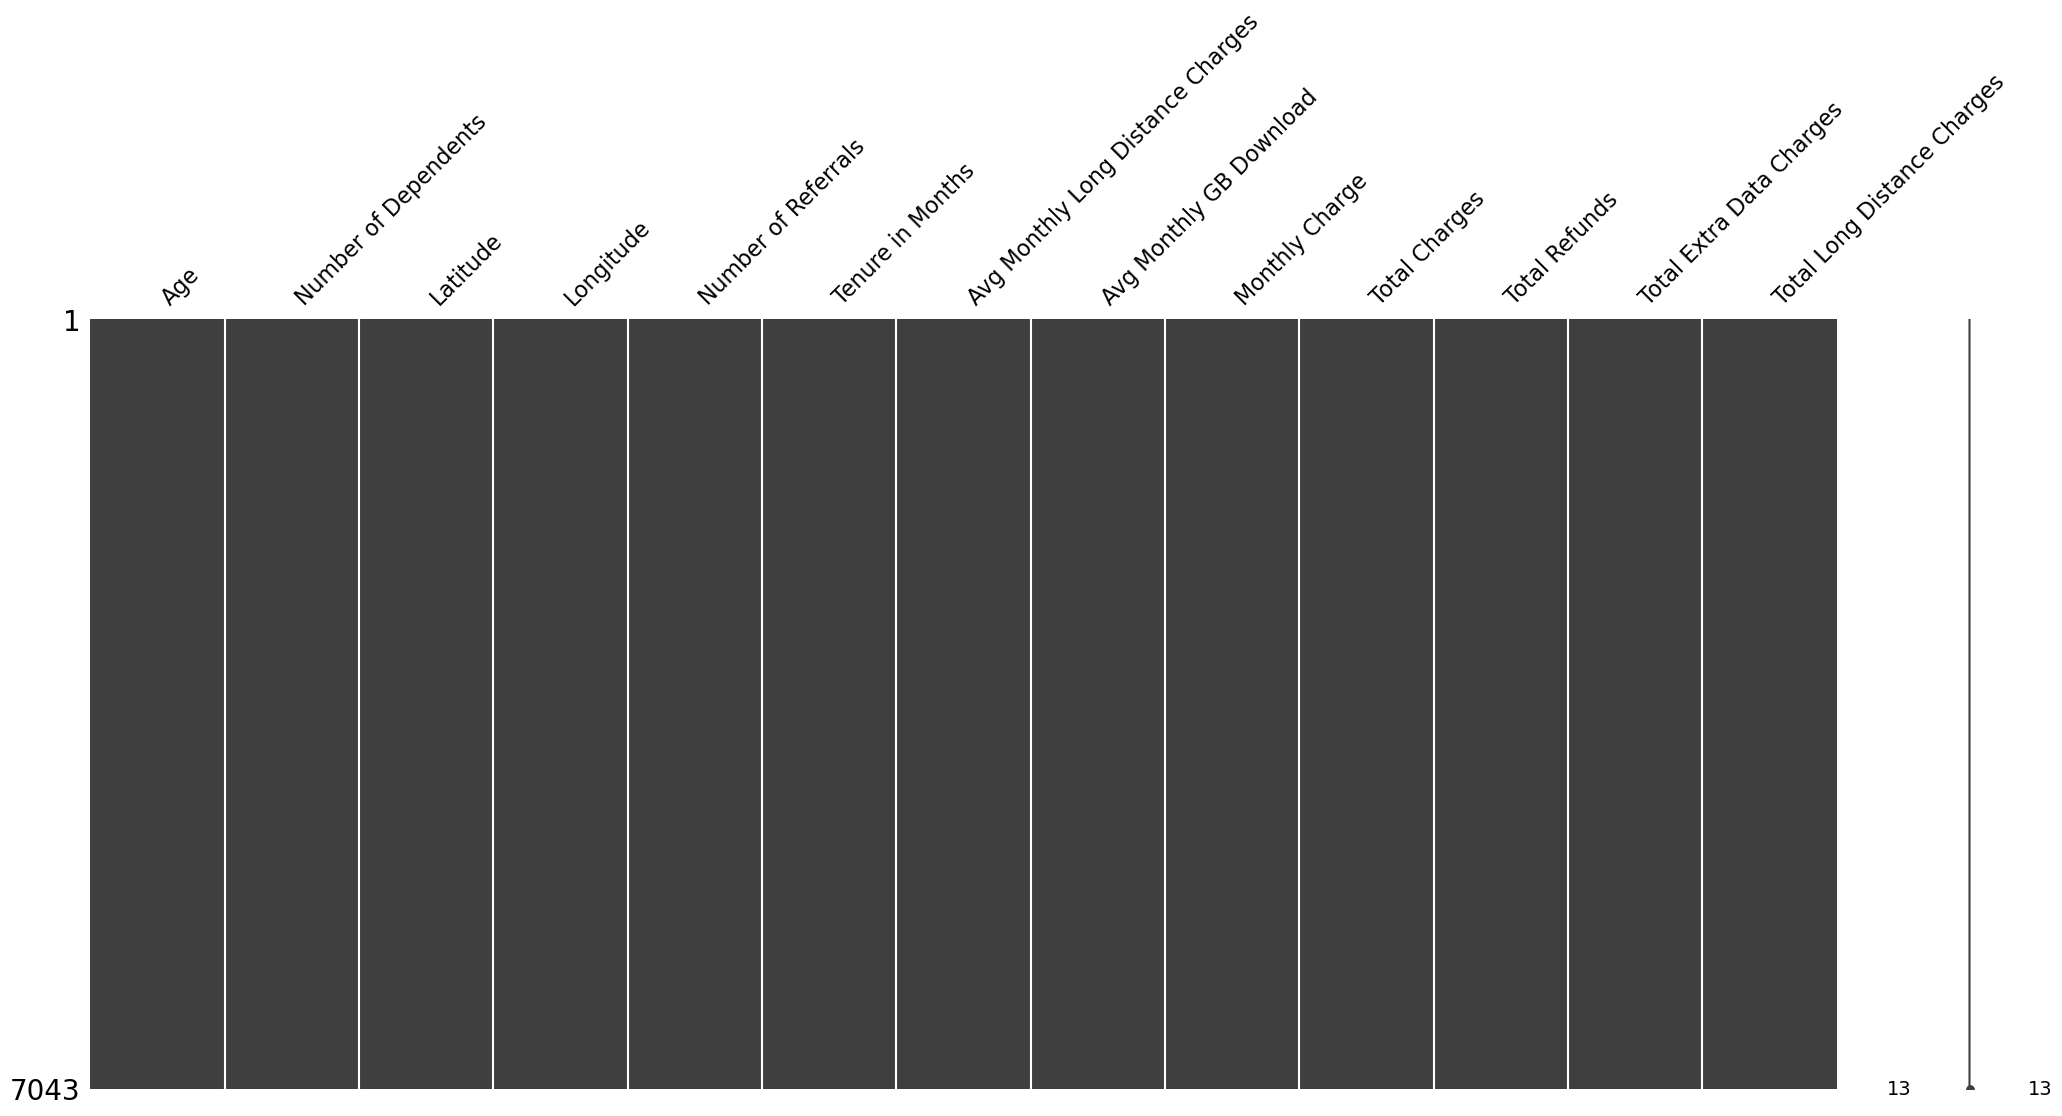

In [42]:
# checking null values
msno.matrix(df2)
print("null values in numerical features:\n",df2.isna().sum())

### Preprocessing(Normalization, Anomaly Detection, and Oversampling)
[Tabel of Contents](#contents_tabel)

In [44]:
df = df2.join(df1_imputed)

In [45]:
X = df.drop(['Customer Status'], axis=1)
y = df.loc[:, 'Customer Status'].values

In [46]:
# Split Data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Anomaly Detection

# One Class Support Vector Machine
ocsvm = OneClassSVM(nu=0.05, kernel='rbf', gamma='auto')
y_train_pred = ocsvm.fit_predict(X_train)

# removing outliers(select only the normal data)
mask =y_train_pred !=-1
X_train, y_train = X_train[mask], y_train[mask]

In [48]:
# Normalization/Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Addressing Imbalanced Labels:
Several preprocessing techniques address the issue of <strong>imbalanced labels</strong>. One common approach is to use resampling methods such as <strong>oversampling</strong> or <strong>undersampling</strong>. Oversampling increases the number of instances in the minority class while undersampling reduces the number of instances in the majority class.

#### Elbow Chart for Determining Best n_component
An elbow chart is utilized to determine the optimal number of components (<strong>n_component</strong>) for dimensionality reduction techniques such as PCA (Principal Component Analysis).



In [51]:
# PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40')])

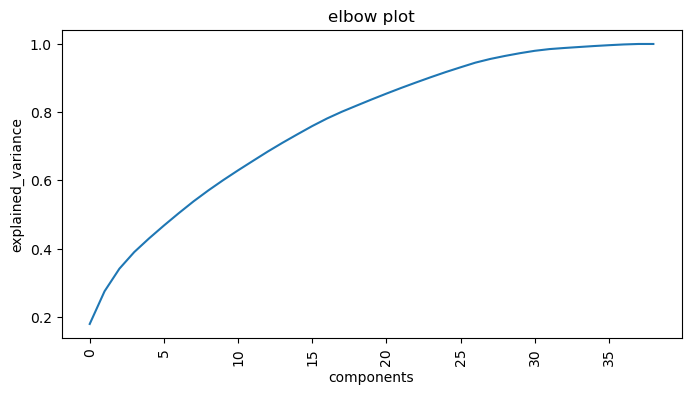

In [52]:
# Determining best n_component for PCA
PC_list = ['PC'+str(i+1) for i in range(39)]

#plotting setup
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi'] = 100

plt.plot(np.cumsum(pca.explained_variance_ratio_ ))
plt.title('elbow plot')
plt.xlabel('components')
plt.ylabel('explained_variance')
plt.xticks(rotation=90)

In [53]:
total_var = np.cumsum(pca.explained_variance_ratio_*100)

for i in range(38):
  print('PC{:2d}, explained_variance: {:0.2f}'.format(i+1, total_var[i]))

PC 1, explained_variance: 17.94
PC 2, explained_variance: 27.52
PC 3, explained_variance: 34.14
PC 4, explained_variance: 39.01
PC 5, explained_variance: 43.02
PC 6, explained_variance: 46.78
PC 7, explained_variance: 50.40
PC 8, explained_variance: 53.88
PC 9, explained_variance: 57.09
PC10, explained_variance: 60.10
PC11, explained_variance: 62.96
PC12, explained_variance: 65.73
PC13, explained_variance: 68.46
PC14, explained_variance: 71.05
PC15, explained_variance: 73.52
PC16, explained_variance: 75.94
PC17, explained_variance: 78.17
PC18, explained_variance: 80.15
PC19, explained_variance: 81.95
PC20, explained_variance: 83.73
PC21, explained_variance: 85.45
PC22, explained_variance: 87.12
PC23, explained_variance: 88.72
PC24, explained_variance: 90.27
PC25, explained_variance: 91.77
PC26, explained_variance: 93.16
PC27, explained_variance: 94.53
PC28, explained_variance: 95.61
PC29, explained_variance: 96.50
PC30, explained_variance: 97.30
PC31, explained_variance: 97.99
PC32, ex

#### Optimal n_component:
Based on the analysis, setting <strong>n_component</strong> to <strong>28</strong> retains <strong>95%</strong> of the information, indicating an effective balance between dimensionality reduction and information retention.

#### Model Selection: Comparing and evaluating models with and without PCA
[Tabel of Contents](#contents_tabel)

In [56]:
from time import perf_counter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [57]:
results = []

In [58]:
# Function to train and evaluate a model
def train_and_evaluate(model, model_name, X_train, X_test, use_pca):
    start_time = perf_counter()
    model.fit(X_train, y_train)
    end_time = perf_counter()

    y_pred = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    training_time = round((end_time - start_time), 4)

    results.append({
        'Model': model_name + (" + PCA" if use_pca else ""),
        'Train Accuracy': train_score,
        'Test Accuracy': test_score,
        'Training Time (sec)': training_time
    })

    return model

# Initialize data (assuming X, y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA transformation
pca = PCA(n_components=0.95)  # Keep 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

results = []

# 1. Logistic Regression
log_reg = train_and_evaluate(LogisticRegression(max_iter=1000), "Logistic Regression", X_train_scaled, X_test_scaled, False)
log_reg_pca = train_and_evaluate(LogisticRegression(max_iter=1000), "Logistic Regression", X_train_pca, X_test_pca, True)

# 2. SVM (create SEPARATE GridSearchCV instances)
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
best_svm = train_and_evaluate(
    GridSearchCV(SVC(), param_grid_svm, cv=5, n_jobs=-1), 
    "SVM", X_train_scaled, X_test_scaled, False
)
best_svm_pca = train_and_evaluate(
    GridSearchCV(SVC(), param_grid_svm, cv=5, n_jobs=-1),  # New instance
    "SVM", X_train_pca, X_test_pca, True
)

# 3. KNN (same approach)
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
best_knn = train_and_evaluate(
    GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, n_jobs=-1),
    "KNN", X_train_scaled, X_test_scaled, False
)
best_knn_pca = train_and_evaluate(
    GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, n_jobs=-1),
    "KNN", X_train_pca, X_test_pca, True
)

# 4. Naïve Bayes
nb = train_and_evaluate(GaussianNB(), "Naïve Bayes", X_train_scaled, X_test_scaled, False)
nb_pca = train_and_evaluate(GaussianNB(), "Naïve Bayes", X_train_pca, X_test_pca, True)

# 5. Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_leaf': [1, 2, 4]}
best_rf = train_and_evaluate(
    GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, n_jobs=-1),
    "Random Forest", X_train_scaled, X_test_scaled, False
)
best_rf_pca = train_and_evaluate(
    GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, n_jobs=-1),
    "Random Forest", X_train_pca, X_test_pca, True
)

# 6. Decision Tree
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
best_dt = train_and_evaluate(
    GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, n_jobs=-1),
    "Decision Tree", X_train_scaled, X_test_scaled, False
)
best_dt_pca = train_and_evaluate(
    GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, n_jobs=-1),
    "Decision Tree", X_train_pca, X_test_pca, True
)

# Save results
results_df = pd.DataFrame(results)
results_df.to_csv("model_performance_comparison.csv", index=False)
print(results_df)


                        Model  Train Accuracy  Test Accuracy  \
0         Logistic Regression        0.833866       0.817601   
1   Logistic Regression + PCA        0.799787       0.789212   
2                         SVM        0.837238       0.820440   
3                   SVM + PCA        0.803692       0.789922   
4                         KNN        1.000000       0.773598   
5                   KNN + PCA        1.000000       0.762243   
6                 Naïve Bayes        0.688498       0.692690   
7           Naïve Bayes + PCA        0.741924       0.740951   
8               Random Forest        1.000000       0.837473   
9         Random Forest + PCA        0.986865       0.787083   
10              Decision Tree        0.885694       0.805536   
11        Decision Tree + PCA        0.902556       0.729595   

    Training Time (sec)  
0                0.0684  
1                0.0772  
2               29.7141  
3               28.0990  
4                1.4846  
5          

### Model Performance Evaluation
[Tabel of Contents](#contents_tabel)

In [60]:
import pandas as pd
from IPython.display import display

# Display the results dataframe with better formatting
display(pd.DataFrame(results).style
       .background_gradient(cmap='Blues', subset=['Train Accuracy', 'Test Accuracy'])
       .background_gradient(cmap='Reds', subset=['Training Time (sec)'])
       .format({'Train Accuracy': '{:.2%}', 'Test Accuracy': '{:.2%}'}))

,Model,Train Accuracy,Test Accuracy,Training Time (sec)
0,Logistic Regression,83.39%,81.76%,0.068400
1,Logistic Regression + PCA,79.98%,78.92%,0.077200
2,SVM,83.72%,82.04%,29.714100
3,SVM + PCA,80.37%,78.99%,28.099000
4,KNN,100.00%,77.36%,1.484600
5,KNN + PCA,100.00%,76.22%,1.047300
6,Naïve Bayes,68.85%,69.27%,0.003800
7,Naïve Bayes + PCA,74.19%,74.10%,0.003500
8,Random Forest,100.00%,83.75%,7.687000
9,Random Forest + PCA,98.69%,78.71%,18.823000


In [61]:
import numpy as np
print("y_train classes:", np.unique(y_train, return_counts=True))
print("y_test classes:", np.unique(y_test, return_counts=True))

y_train classes: (array([0, 1, 2]), array([1496,  357, 3781], dtype=int64))
y_test classes: (array([0, 1, 2]), array([373,  97, 939], dtype=int64))


### ROC Curve Analysis
[Tabel of Contents](#contents_tabel)

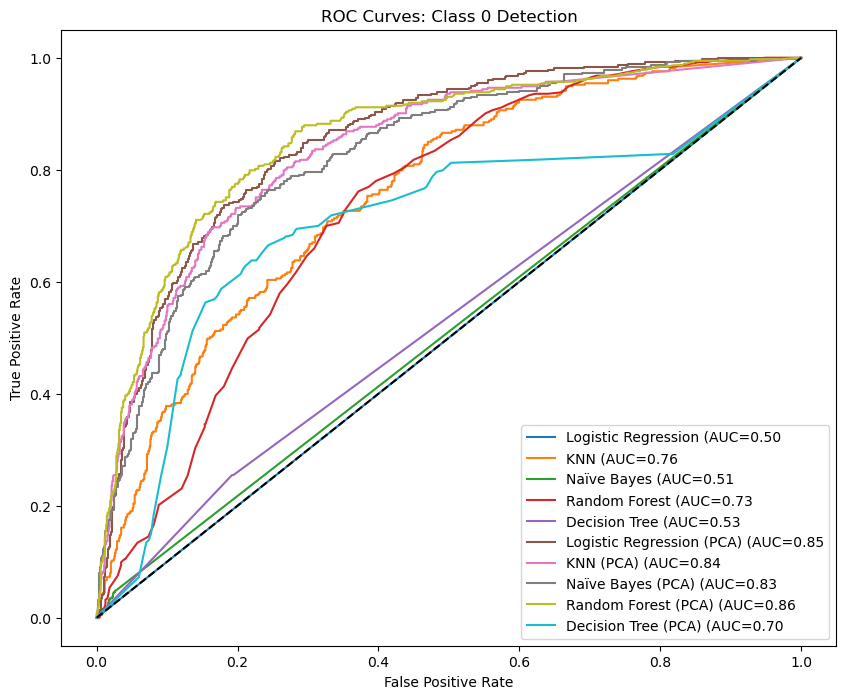

In [63]:

y_test_binary = np.where(y_test == 0, 1, 0)

model_data_mapping = [
    # Non-PCA models (trained on original features)
    (log_reg, "Logistic Regression", X_test),
    (best_svm, "SVM", X_test),
    (best_knn, "KNN", X_test),
    (nb, "Naïve Bayes", X_test),
    (best_rf, "Random Forest", X_test),
    (best_dt, "Decision Tree", X_test),
    
    # PCA models (trained on PCA-transformed features)
    (log_reg_pca, "Logistic Regression (PCA)", X_test_pca),
    (best_svm_pca, "SVM (PCA)", X_test_pca),
    (best_knn_pca, "KNN (PCA)", X_test_pca),
    (nb_pca, "Naïve Bayes (PCA)", X_test_pca),
    (best_rf_pca, "Random Forest (PCA)", X_test_pca),
    (best_dt_pca, "Decision Tree (PCA)", X_test_pca)
]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for model, name, X_data in model_data_mapping:
    if hasattr(model, "predict_proba"):
        scores = model.predict_proba(X_data)[:, 0]
        fpr, tpr, _ = roc_curve(y_test_binary, scores)
        plt.plot(fpr, tpr, label=f'{name} (AUC={auc(fpr, tpr):.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Class 0 Detection')
plt.legend()
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

### Confusion Matrix Analysis
[Tabel of Contents](#contents_tabel)

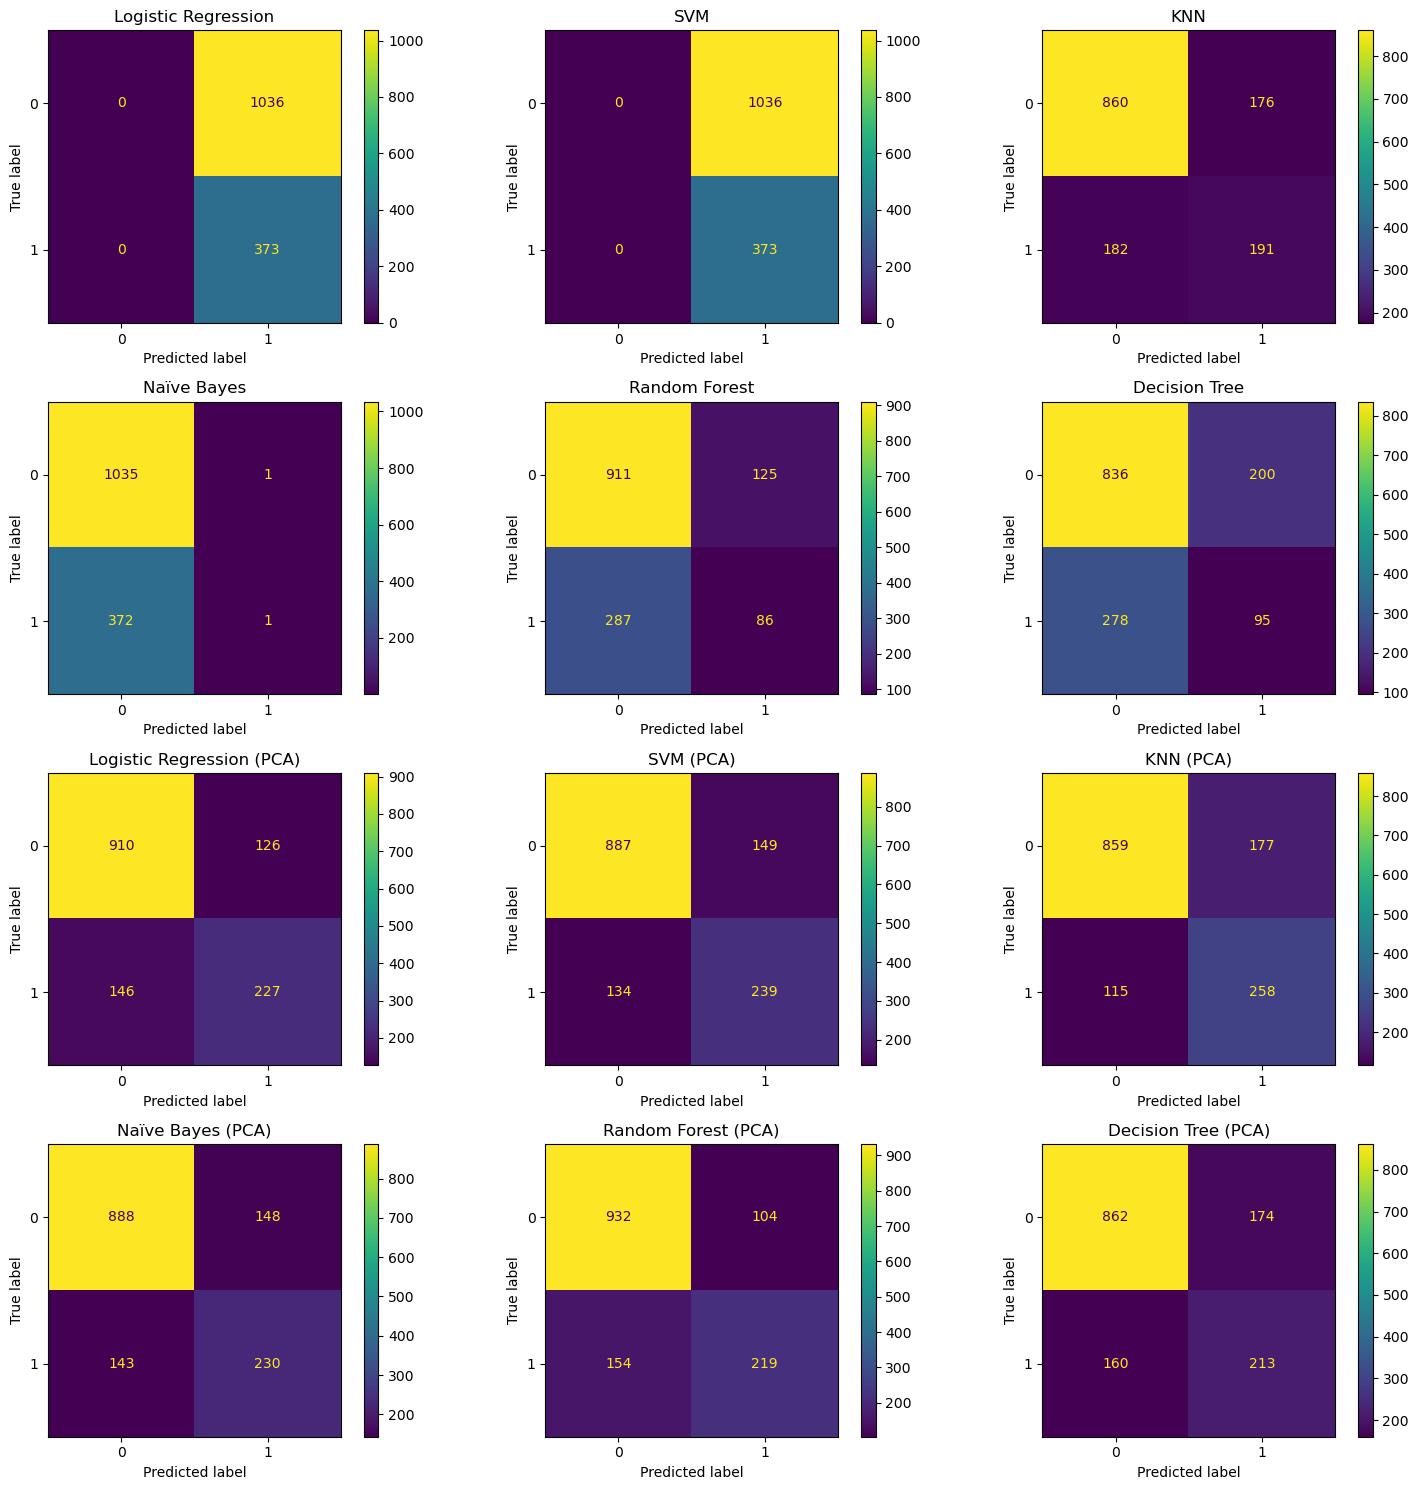

In [65]:
n_rows = 4  # Adjust based on how many you want per column
n_cols = 3  # For 12 models
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

for idx, (model, name, X_data) in enumerate(model_data_mapping):
    row = idx // n_cols
    col = idx % n_cols
    ax = axes[row, col]
    
    y_pred = model.predict(X_data)
    y_pred_binary = np.where(y_pred == 0, 1, 0)
    
    cm = confusion_matrix(y_test_binary, y_pred_binary)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax)
    ax.grid(False)
    ax.set_title(name)

plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

### Model Performance Metrics (Multiclass)
[Tabel of Contents](#contents_tabel)

In [66]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X, y_true, model_name):
    """Evaluate a model and return selected metrics for multiclass classification"""
    y_pred = model.predict(X)
    
    # For multiclass, we'll use 'weighted' average which accounts for class imbalance
    avg_method = 'weighted'
    
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average=avg_method),
        'Recall': recall_score(y_true, y_pred, average=avg_method),
        'F1-Score': f1_score(y_true, y_pred, average=avg_method)
    }

# Evaluate all models
results = []
for model, name, X_data in model_data_mapping:
    try:
        results.append(evaluate_model(model, X_data, y_test, name))
    except Exception as e:
        print(f"Error evaluating {name}: {str(e)}")
        continue

# Create DataFrame
results_df = pd.DataFrame(results)

# Sort by F1-Score (descending) as the primary metric
results_df = results_df.sort_values('F1-Score', ascending=False)

# Format for display (3 decimal places)
results_df = results_df.round(3)

# Reorder columns for better readability
results_df = results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']]

# Display the table with styling
styled_table = (results_df.style
                .background_gradient(subset=['F1-Score'], cmap='YlGn')
                .background_gradient(subset=['Accuracy'], cmap='Blues')
                .set_properties(**{'text-align': 'center'})
                .set_caption('Model Performance Metrics (Multiclass)')
                .format({
                    'Accuracy': '{:.3f}',
                    'Precision': '{:.3f}', 
                    'Recall': '{:.3f}',
                    'F1-Score': '{:.3f}'
                }))

display(styled_table)


,Model,Accuracy,Precision,Recall,F1-Score
6,Logistic Regression (PCA),0.789,0.785,0.789,0.787
7,SVM (PCA),0.790,0.785,0.790,0.785
10,Random Forest (PCA),0.787,0.772,0.787,0.774
8,KNN (PCA),0.762,0.766,0.762,0.762
9,Naïve Bayes (PCA),0.741,0.764,0.741,0.751
11,Decision Tree (PCA),0.730,0.731,0.730,0.730
2,KNN,0.705,0.651,0.705,0.677
4,Random Forest,0.669,0.584,0.669,0.612
5,Decision Tree,0.603,0.537,0.603,0.565
3,Naïve Bayes,0.667,0.577,0.667,0.535
